In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/validacionCruzada/{name}.png', dpi=200, bbox_inches='tight')

In [3]:
df = pd.read_csv('../data/resultados/validacionCruzada/crossValidationRESULTS.csv', sep=';')
df.head()

,Model,CV,Precision,Tipo
0,RANDOM_FOREST,1,0.996587,ENTRENAMIENTO
1,RANDOM_FOREST,1,0.993680,VALIDACION
2,RANDOM_FOREST,1,0.993541,TEST
3,RANDOM_FOREST,2,0.996402,ENTRENAMIENTO
4,RANDOM_FOREST,2,0.993902,VALIDACION


In [4]:
df_random_forest = df[df['Model'] == 'RANDOM_FOREST']

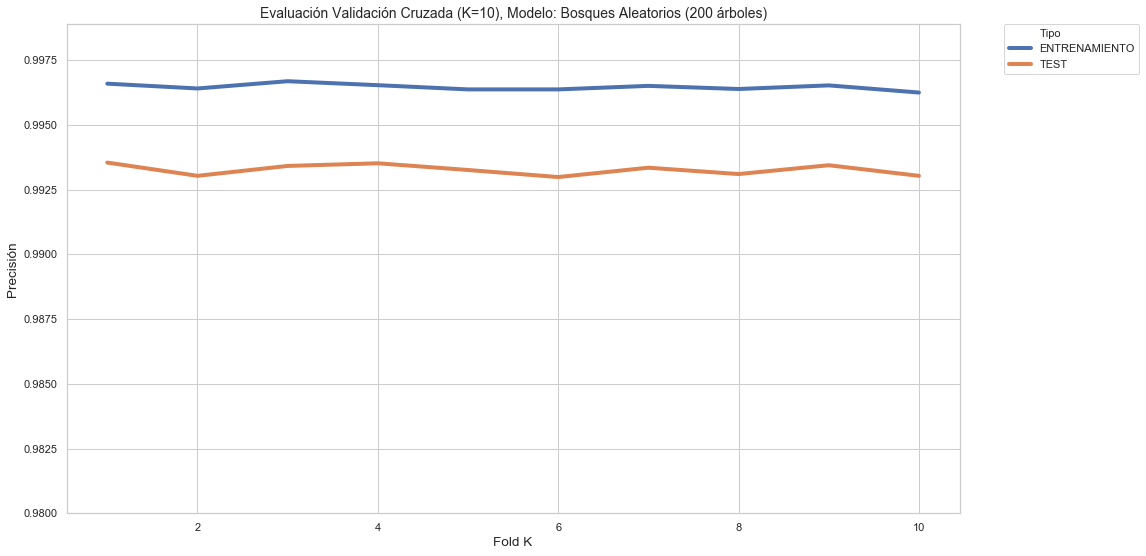

In [5]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='CV', y="Precision", hue='Tipo', data=df_random_forest[df_random_forest['Tipo'] != 'VALIDACION'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Evaluación Validación Cruzada (K=10), Modelo: Bosques Aleatorios (200 árboles)", fontsize=14)
plt.xlabel('Fold K')
plt.ylabel("Precisión")


plt.ylim([0.980, 0.9988888])
plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'BosqueAleatorio_CV')

In [6]:
df_knn = df[df['Model'] == 'KNN']

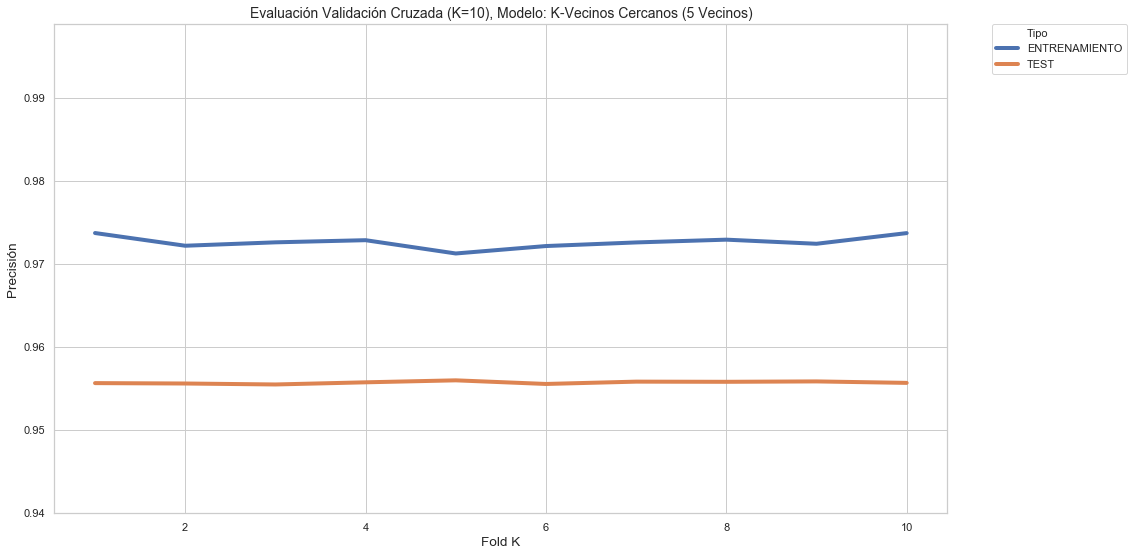

In [7]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='CV', y="Precision", hue='Tipo', data=df_knn[df_knn['Tipo'] != 'VALIDACION'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Evaluación Validación Cruzada (K=10), Modelo: K-Vecinos Cercanos (5 Vecinos)", fontsize=14)
plt.xlabel('Fold K')
plt.ylabel("Precisión")

plt.ylim([0.940, 0.9988888])
plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'KNN_CV')

In [8]:
df_rrnn = df[df['Model'] == 'RRNN']

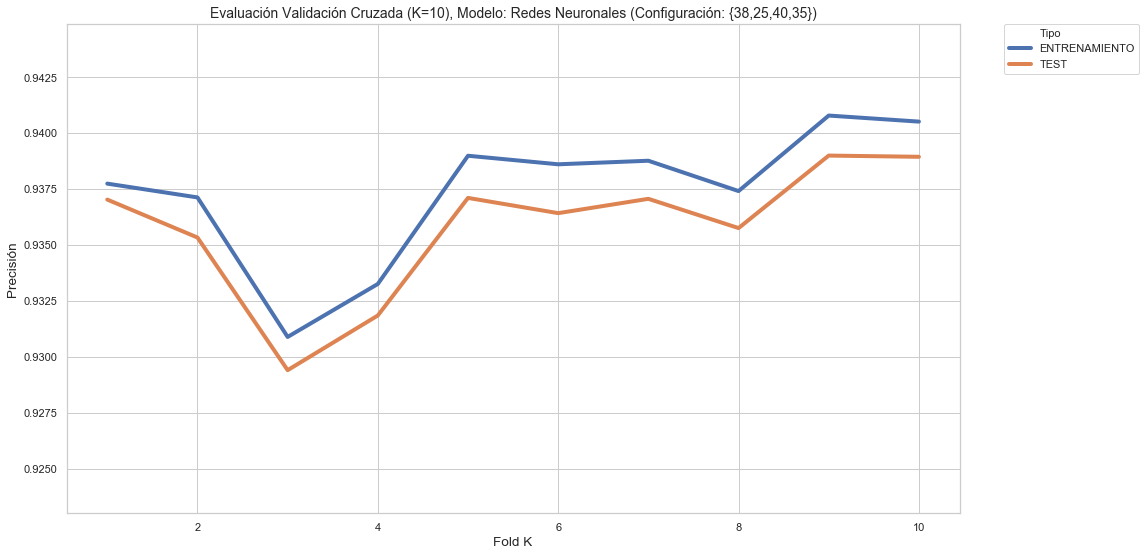

In [9]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='CV', y="Precision", hue='Tipo', data=df_rrnn[df_rrnn['Tipo'] != 'VALIDACION'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Evaluación Validación Cruzada (K=10), Modelo: Redes Neuronales (Configuración: {38,25,40,35})", fontsize=14)
plt.xlabel('Fold K')
plt.ylabel("Precisión")

plt.ylim([0.9230, 0.9448888])
plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'RRNN_CV')

In [10]:
df_ensemble = df[df['Model'] == 'ENSEMBLE']

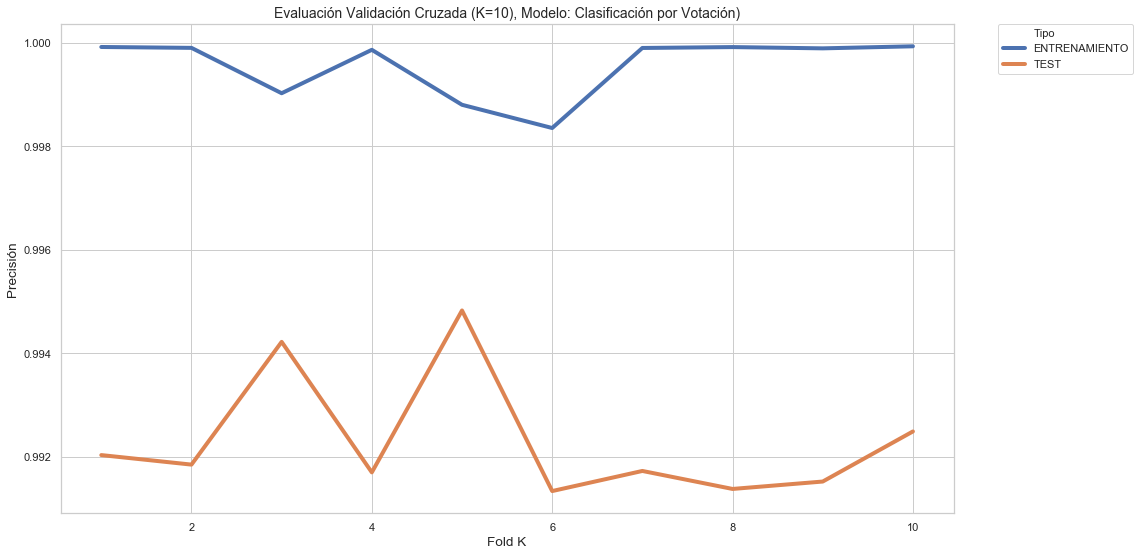

In [11]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='CV', y="Precision", hue='Tipo', data=df_ensemble[df_ensemble['Tipo'] != 'VALIDACION'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Evaluación Validación Cruzada (K=10), Modelo: Clasificación por Votación)", fontsize=14)
plt.xlabel('Fold K')
plt.ylabel("Precisión")

plt.show()


fig = sns_plot.get_figure()
saveFigure(sns_plot, 'Ensemble_CV')

In [12]:
def generate_metrics(train, test):
    print(f"Media Train: {round(np.mean(train), 5)}")
    print(f"Desviacion estandar Train: {round(np.std(train), 5)}")
    print(f"Media Test: {round(np.mean(test), 5)}")
    print(f"Desviacion estandar Test: {round(np.std(test), 5)}")

In [13]:
rf_train = df_random_forest[df_random_forest['Tipo'] == 'ENTRENAMIENTO']['Precision'].values
rf_test = df_random_forest[df_random_forest['Tipo'] == 'TEST']['Precision'].values

print("Bosques aleatorios")
generate_metrics(rf_train, rf_test)

Bosques aleatorios
Media Train: 0.99646
Desviacion estandar Train: 0.00012
Media Test: 0.99326
Desviacion estandar Test: 0.0002


In [14]:
knn_train = df_knn[df_knn['Tipo'] == 'ENTRENAMIENTO']['Precision'].values
knn_test = df_knn[df_knn['Tipo'] == 'TEST']['Precision'].values

print("K-Vecinos Cercanos")
generate_metrics(knn_train, knn_test)

K-Vecinos Cercanos
Media Train: 0.97266
Desviacion estandar Train: 0.0007
Media Test: 0.95574
Desviacion estandar Test: 0.00015


In [15]:
rrnn_train = df_rrnn[df_rrnn['Tipo'] == 'ENTRENAMIENTO']['Precision'].values
rrnn_test = df_rrnn[df_rrnn['Tipo'] == 'TEST']['Precision'].values

print("Redes Neuronales")
generate_metrics(rrnn_train, rrnn_test)

Redes Neuronales
Media Train: 0.93742
Desviacion estandar Train: 0.00295
Media Test: 0.9358
Desviacion estandar Test: 0.00287


In [16]:
ensemble_train = df_ensemble[df_ensemble['Tipo'] == 'ENTRENAMIENTO']['Precision'].values
ensemble_test = df_ensemble[df_ensemble['Tipo'] == 'TEST']['Precision'].values

print("Clasificación por Votación")
generate_metrics(ensemble_train, ensemble_test)

Clasificación por Votación
Media Train: 0.99955
Desviacion estandar Train: 0.00056
Media Test: 0.99231
Desviacion estandar Test: 0.00116


## Comparativa Global

In [17]:
with open('../data/resultados/validacionCruzada/crossValidationRESULTS.csv', 'r', encoding='utf-8') as f:
    data = [x.strip() for x in f.readlines()]
data.pop(0)
data = [x.split(';') for x in data]

In [18]:
std_train_dict = {'RANDOM_FOREST': 0.00012219920002823912, "KNN": 0.0029479316924764425, "RRNN": 0.0006955805117738951, "ENSEMBLE": 0.0005607508747145789} 

std_test_dict = {'RANDOM_FOREST': 0.00020352527287221698, "KNN": 0.0028664184891039877, "RRNN": 0.00014562654591918032, "ENSEMBLE": 0.0011597330795364343}


with open('../data/resultados/validacionCruzada/resultados_globales.csv', 'w', encoding='utf-8') as file:
    file.write("Modelo;CV;Precision;Tipo\n")
    for model, fold , precision, tipo in data:
        if tipo == "ENTRENAMIENTO":
        
            file.write(f"{model};{fold};{float(precision) + std_train_dict[model]};{tipo}\n")
            file.write(f"{model};{fold};{float(precision) - std_train_dict[model]};{tipo}\n")
        elif tipo == "TEST":
            file.write(f"{model};{fold};{float(precision) + std_test_dict[model]};{tipo}\n")
            file.write(f"{model};{fold};{float(precision) - std_test_dict[model]};{tipo}\n")
        else:
            pass

In [19]:
df_global = pd.read_csv('../data/resultados/validacionCruzada/resultados_globales.csv', sep=';')
df_global.head()

,Modelo,CV,Precision,Tipo
0,RANDOM_FOREST,1,0.996710,ENTRENAMIENTO
1,RANDOM_FOREST,1,0.996465,ENTRENAMIENTO
2,RANDOM_FOREST,1,0.993744,TEST
3,RANDOM_FOREST,1,0.993337,TEST
4,RANDOM_FOREST,2,0.996524,ENTRENAMIENTO


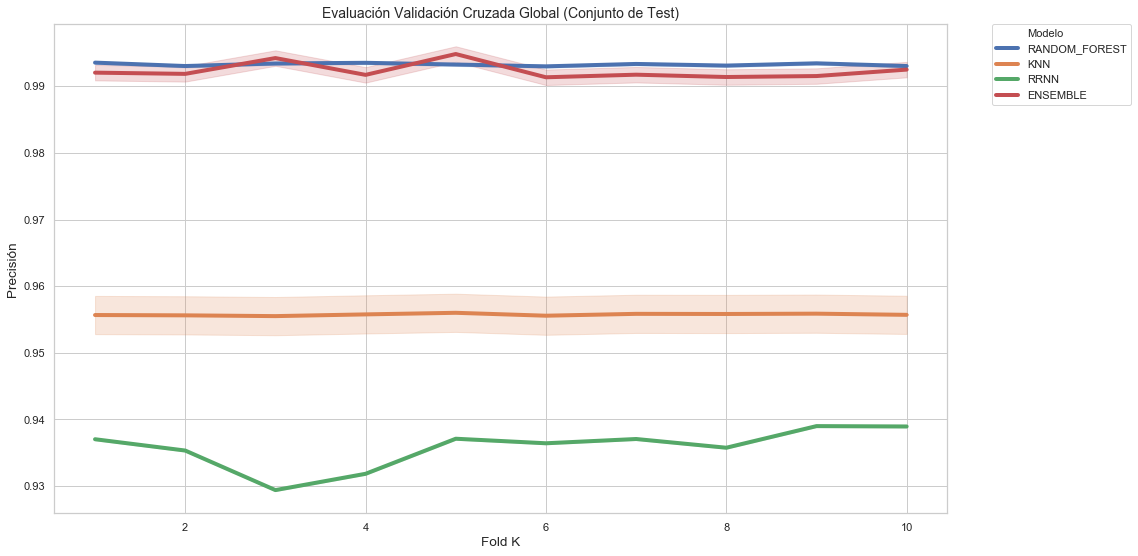

In [20]:
plt.figure(figsize=(16,9))
sns_plot = sns.lineplot(x='CV', y="Precision", hue='Modelo', data=df_global[df_global['Tipo'] == 'TEST'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.title("Evaluación Validación Cruzada Global (Conjunto de Test)", fontsize=14)
plt.xlabel('Fold K')
plt.ylabel("Precisión")

plt.show()

saveFigure(sns_plot, 'globalCV')